In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
from sklearn.model_selection import train_test_split 
import seaborn as sns
import matplotlib.pyplot as plt

from operator import itemgetter
import matplotlib.ticker as ticker
import math

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold



from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from typing import Dict, Tuple
from scipy import stats
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

%matplotlib inline 
sns.set(style="ticks")

## Выборка датасета и ее разделение на тестовую и обучающую

In [9]:
wine = load_wine()

In [10]:
for x in wine:
    print(x)

data
target
frame
target_names
DESCR
feature_names


In [11]:
# Сформируем DataFrame
wine_df = pd.DataFrame(data= np.c_[wine['data']],
                     columns= wine['feature_names'])

In [12]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [13]:
sc = MinMaxScaler()
wine_sc = sc.fit_transform(wine_df)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(
wine_sc, wine.target, test_size=0.33, random_state=1)

In [15]:
X_train = X_train.to_numpy()

X_test = X_test.to_numpy()


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

## Обучение моделей 

### Обучение линейной модели 

In [57]:
# Обучим линейную регрессию и сравним коэффициенты с рассчитанными ранее
reg1 = LinearRegression().fit(X_train, Y_train.reshape(-1, 1))
reg1.coef_, reg1.intercept_


(array([[-0.3976376 ,  0.06900004, -0.09455592,  0.67398288, -0.28642767,
          0.52588975, -1.74765428, -0.17922208,  0.03652941,  0.96993586,
         -0.36623749, -0.65402594, -1.20252002]]),
 array([1.9579414]))

In [72]:
target1 = reg1.predict(X_test)

In [73]:
mean_squared_error(Y_test, target1), mean_absolute_error(Y_test, target1)



(0.07434617175982262, 0.21742003782587782)

### Обучение SVM

In [70]:
svr = SVR()
svr.fit(X_train, Y_train)





SVR()

In [74]:
target2 = svr.predict(X_test)

mean_squared_error(Y_test, target2), mean_absolute_error(Y_test, target2)

(0.02266297424014328, 0.1065218053756329)

### Обучение деревья решений  

### Классификация 

In [83]:


def plot_tree_classification(title_param, ds):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    
    n_classes = len(np.unique(ds.target))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = ds.data[:, pair]
        y = ds.target

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(ds.feature_names[pair[0]])
        plt.ylabel(ds.feature_names[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], c=color, label=ds.target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

        plt.show()    
        
        
    



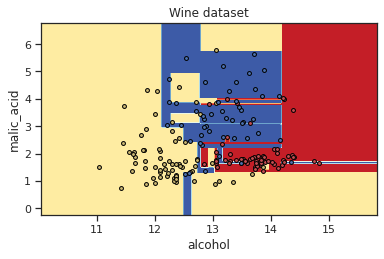

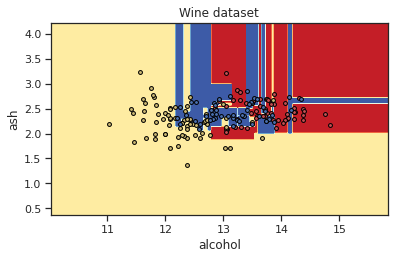

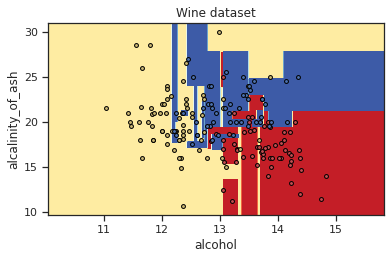

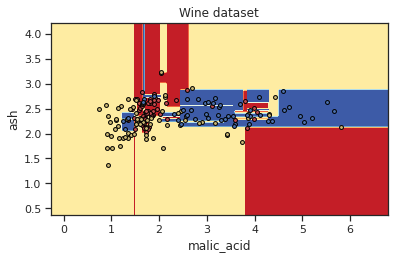

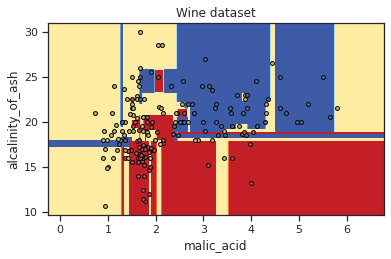

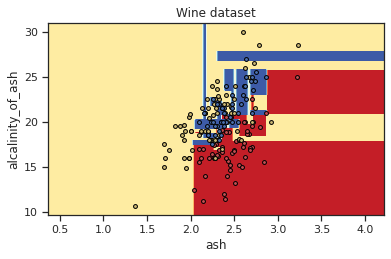

In [84]:
plot_tree_classification('Wine dataset', wine)



In [88]:
clf = DecisionTreeClassifier(random_state=1).fit(X_train, Y_train)
target3 = clf.predict(X_test)
accuracy_score(Y_test, target3), precision_score(Y_test, target3, average='macro')

(0.9491525423728814, 0.9464285714285715)

### Регрессия 

In [1]:


def random_dataset_for_regression():
    """
    Создание случайного набора данных для регрессии
    """
    rng = np.random.RandomState(1)
    X_train = np.sort(5 * rng.rand(80, 1), axis=0)
    y_train = np.sin(X_train).ravel()
    y_train[::5] += 3 * (0.5 - rng.rand(16))
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    return X_train, y_train, X_test



In [2]:


def plot_tree_regression(X_train, y_train, X_test):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """

    # Обучение регрессионной модели
    regr_1 = DecisionTreeRegressor(max_depth=3)
    regr_2 = DecisionTreeRegressor(max_depth=10)
    regr_1.fit(X_train, y_train)
    regr_2.fit(X_train, y_train)

    # Предсказание
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Вывод графика
    fig, ax = plt.subplots(figsize=(15,7))
    plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="Данные")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=3", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=10", linewidth=2)
    plt.xlabel("Данные")
    plt.ylabel("Целевой признак")
    plt.title("Регрессия на основе дерева решений")
    plt.legend()
    plt.show()



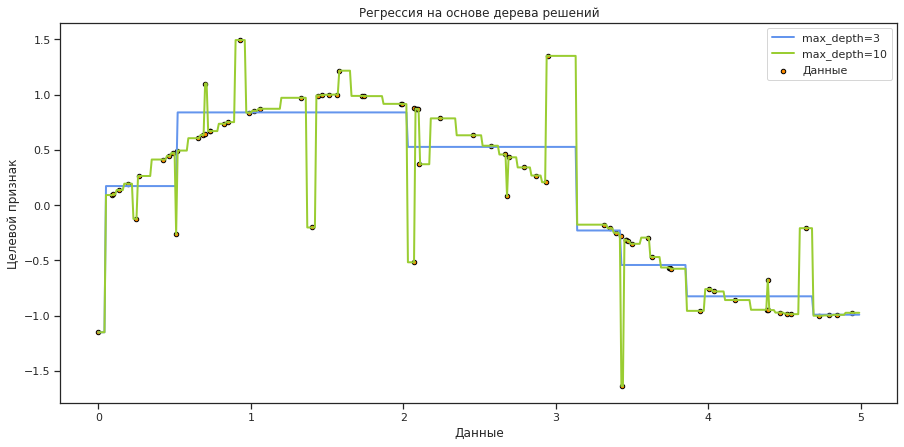

In [5]:


X_train, Y_train, X_test = random_dataset_for_regression()
plot_tree_regression(X_train, Y_train, X_test)



In [16]:
clf = DecisionTreeRegressor(random_state=1).fit(X_train, Y_train)
target4 = clf.predict(X_test)
mean_squared_error(Y_test, target4), mean_absolute_error(Y_test, target4)

(0.0847457627118644, 0.0847457627118644)